In [1]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 

In [2]:
# Data as pandas dataframes 
X = adult.data.features
y = adult.data.targets

X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [3]:
# Numerical attributes
# Generates descriptive statistics that summarizes the central tendency, shape and dispersion.
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
# Categorical attributes
X.describe(include=object)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,47879,48842,48842,47876,48842,48842,48842,48568
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,33906,15784,22379,6172,19716,41762,32650,43832


In [5]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

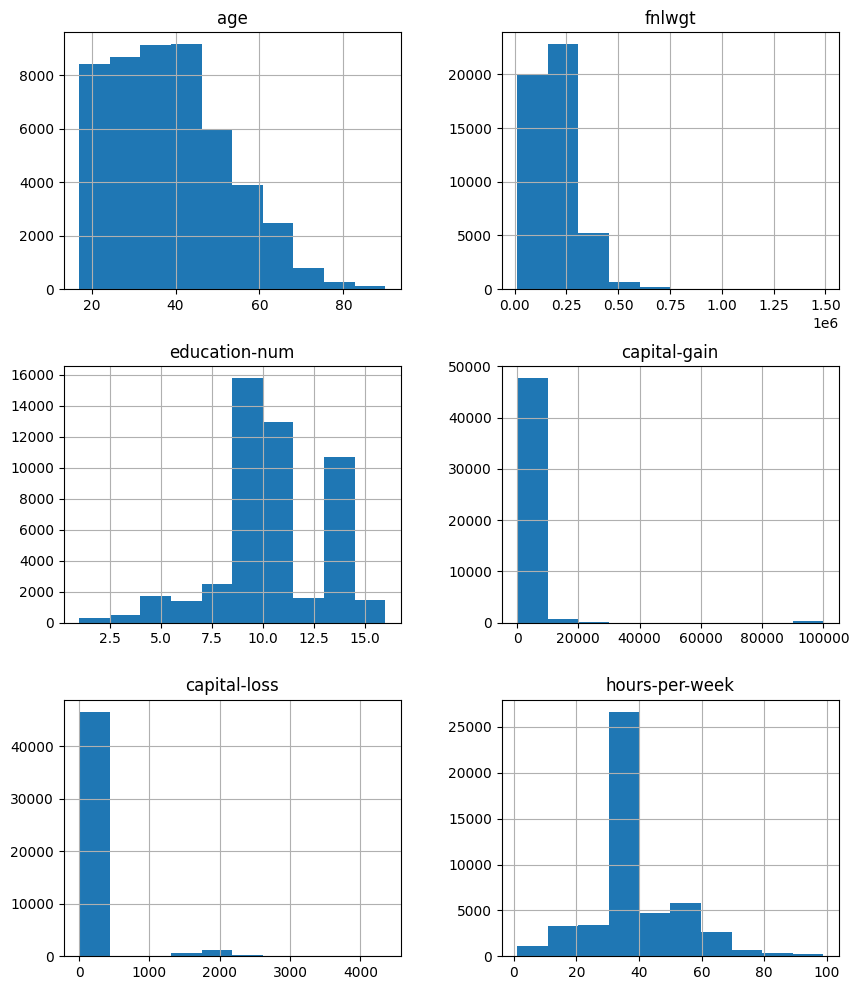

In [6]:
# Plot historgram
# select_dtypes returns a subset of columns of a specific type
numerical_attributes = X.select_dtypes(include=['int'])

# hist() makes a historgram of the DataFrames columns
numerical_attributes.hist(figsize=(10,12))

<Axes: xlabel='workclass', ylabel='count'>

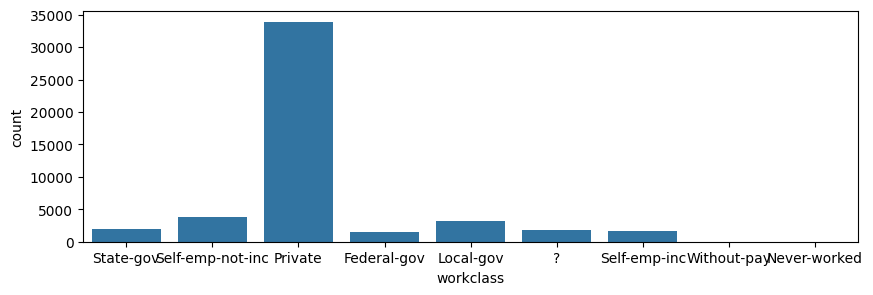

In [7]:
# Plot count for categorical data
categorical_attributes = X.select_dtypes(include=['object'])

# Count PLot
# plt.figure() Creates a new figure or activates an existing figure.
plt.figure(figsize=(10,3))
sns.countplot(data = categorical_attributes, x = "workclass")

<Axes: xlabel='education', ylabel='count'>

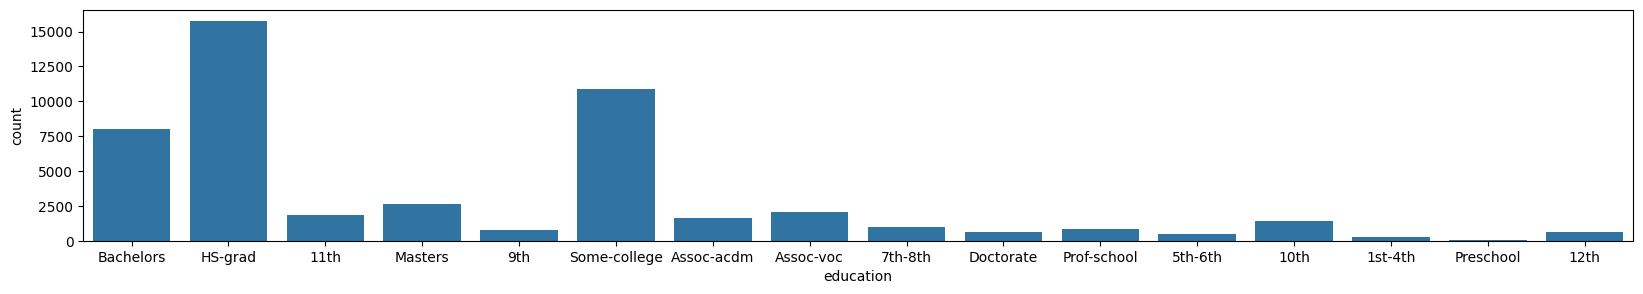

In [8]:
# Plotting education
plt.figure(figsize=(20,3))
sns.countplot(data = categorical_attributes, x = "education")

<Axes: xlabel='education', ylabel='count'>

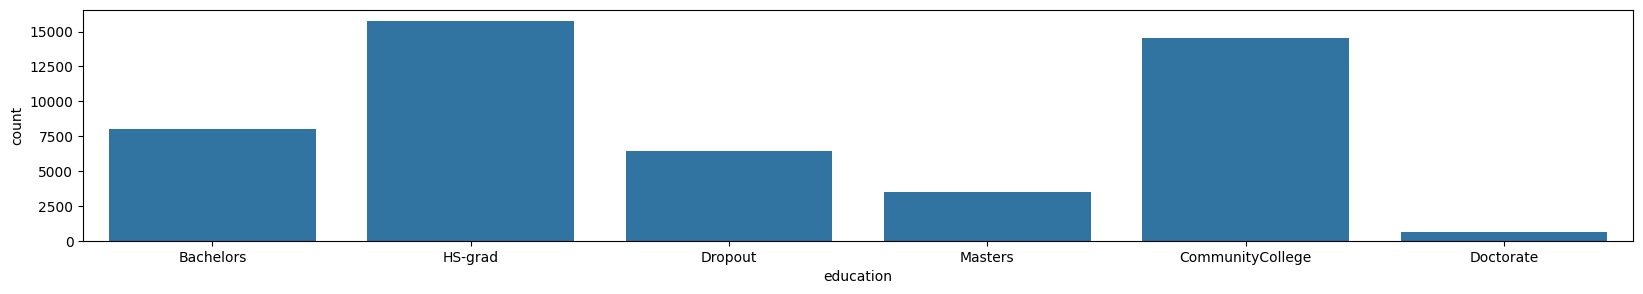

In [9]:
data = X.copy(deep=True)

# Because for education there are many groups, we can use domain knowledge to group them
education_mapping = {
    'Preschool': 'Dropout',
    '10th': 'Dropout',
    '11th': 'Dropout',
    '12th': 'Dropout',
    '1st-4th': 'Dropout',
    '5th-6th': 'Dropout',
    '7th-8th': 'Dropout',
    '9th': 'Dropout',
    'HS-Grad': 'HighSchoolGrad',
    'Some-college': 'CommunityCollege',
    'Assoc-acdm': 'CommunityCollege',
    'Assoc-voc': 'CommunityCollege',
    'Prof-school': 'Masters'
}

# Apply mapping in one step
data['education'] = data['education'].replace(education_mapping)

# Plot
fig=plt.figure(figsize=(20,3))
sns.countplot(x="education", data=data)

<Axes: xlabel='native-country', ylabel='count'>

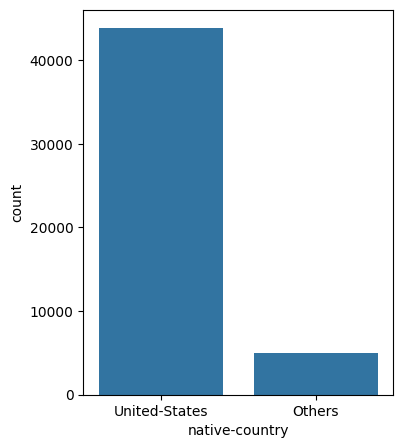

In [10]:
# Count plot for the native country 
data['native-country'] = data['native-country'].apply(lambda el: "United-States" if el == "United-States" else "Others")

# Plot Count plot 
fig = plt.figure(figsize=(4,5))
sns.countplot(x="native-country", data=data)

<Axes: xlabel='sex', ylabel='count'>

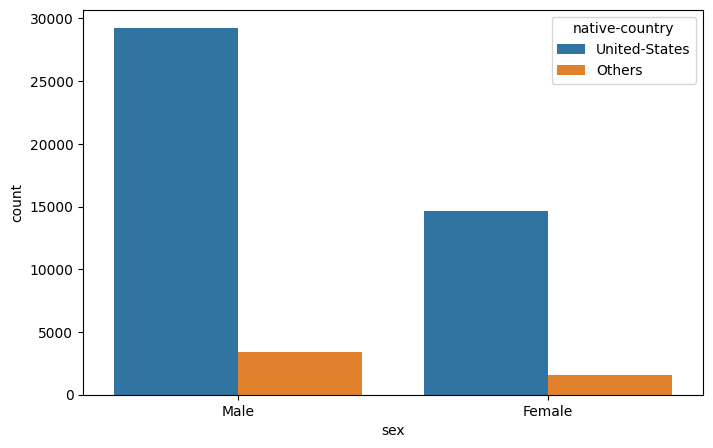

In [11]:
# Plot cross tabulation values ofr native-country and sex

#pandas.crosstab = Compute a simple cross tabulation of 2 or more factors. 
# crosstab = two- or more dimenstional table that records frequency of values with specific characteristics

bivariate_data = pd.crosstab(data['native-country'], data['sex'], margins=True)

plt.figure(figsize=(8,5))
sns.countplot(data=data, x="sex", hue="native-country")

<Axes: xlabel='education', ylabel='count'>

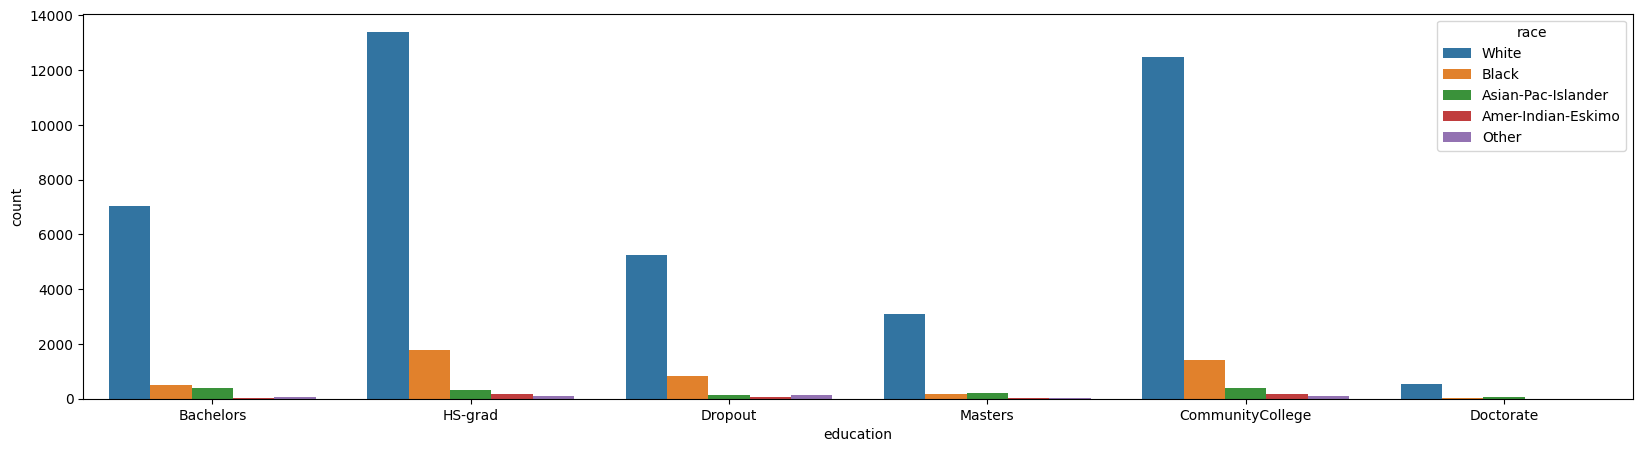

In [12]:
# Cross tabular data for education and income (bivariate)
fig = plt.figure(figsize=(20, 5))
sns.countplot(x="education", hue="race", data=data)

<Axes: >

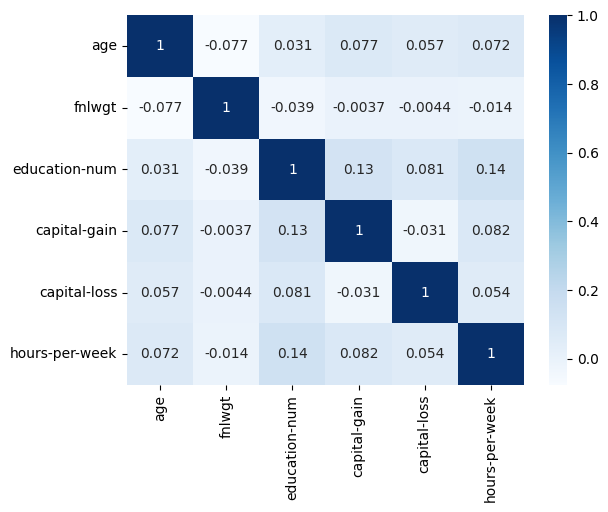

In [13]:
# Heatmap for Census data
numeric_census = X.select_dtypes(include=["float64", "int64"])

sns.heatmap(numeric_census.corr(), annot=True, cmap="Blues")

In [38]:
# Extrat 50k or less
data = pd.concat([X, y], axis=1)

low_salary = data[data['income'] == '<=50K']
high_salary = data[data['income'] == '>50K']

low_work_hours = low_salary['hours-per-week']
high_work_hours = high_salary['hours-per-week']

# Perform t-test
t_stat, p_value = stats.ttest_ind(low_work_hours, high_work_hours)

print("t-stat is", t_stat)
print("p-value is", p_value)

t-stat is -42.583873499437956
p-value is 0.0


In [41]:
private = data[data['workclass'] == 'Private']
state = data[data['workclass'] == 'State-gov']

# Extract hours per week for private vs state 
private_work_hours = private['hours-per-week']
state_work_hours = state['hours-per-week']

# Perform t-test
t_stat, p_value = stats.ttest_ind(private_work_hours, state_work_hours)

print("t-stat is", t_stat)
print("p-value is", p_value)

t-stat is 4.535906933555224
p-value is 5.754200467809564e-06


In [44]:
private = data[data['workclass'] == 'Private']
state = data[data['workclass'] == 'State-gov']

# Extract azage for private vs state
private_age = private['age']
state_age = private['age']

# Perform t-test
t_stat, p_value = stats.ttest_ind(private_age, state_age)

print("t-stat is", t_stat)
print("p-value is", p_value)

t-stat is 0.0
p-value is 1.0
